In [39]:
# Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# Importing data
data = pd.read_csv('salaries.csv')
data

,company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


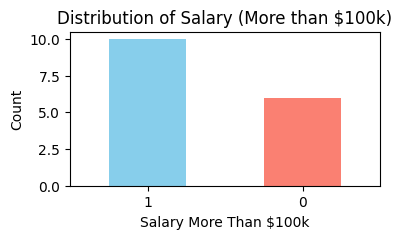

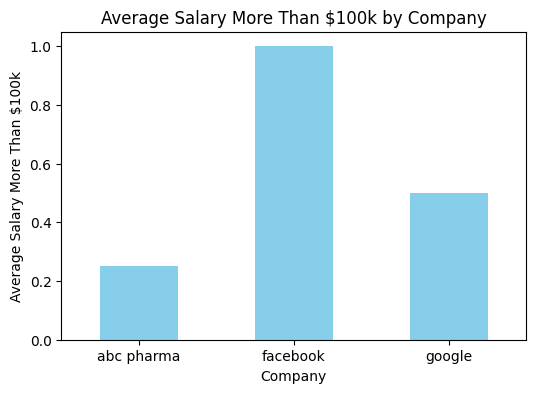

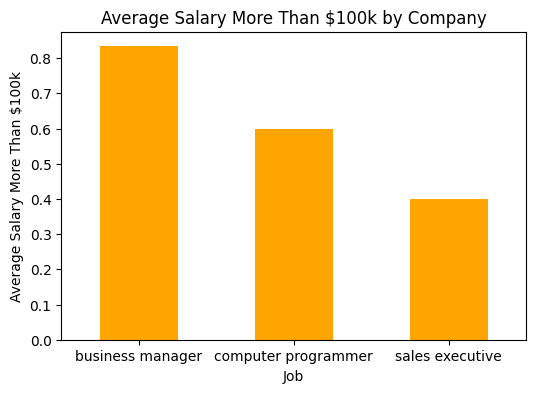

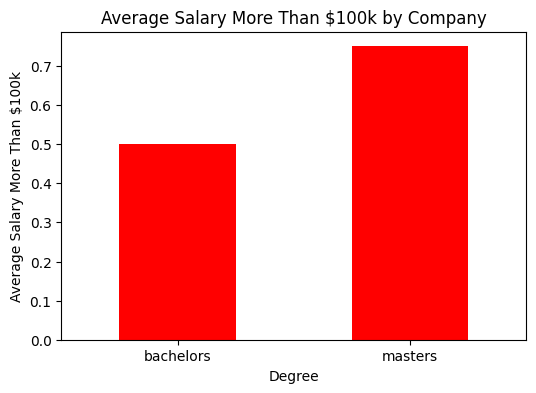

In [41]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(4, 2))
# Calculating the frequency of each unique value in the salary_more_than_100k column
data['salary_more_than_100k'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Salary (More than $100k)')
plt.xlabel('Salary More Than $100k')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for 'company' vs. 'salary_more_than_100k'
plt.figure(figsize=(6, 4))
# Grouping the data by the company column and then calculating the mean of the salary_more_than_100k column within each group. 
data.groupby('company')['salary_more_than_100k'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Salary More Than $100k by Company')
plt.xlabel('Company')
plt.ylabel('Average Salary More Than $100k')
plt.xticks(rotation=0)
plt.show()

# Bar plot for 'company' vs. 'salary_more_than_100k'
plt.figure(figsize=(6,4))
data.groupby('job')['salary_more_than_100k'].mean().plot(kind='bar', color='orange')
plt.title('Average Salary More Than $100k by Company')
plt.xlabel('Job')
plt.ylabel('Average Salary More Than $100k')
plt.xticks(rotation=0)
plt.show()

# Bar plot for 'company' vs. 'salary_more_than_100k'
plt.figure(figsize=(6, 4))
data.groupby('degree')['salary_more_than_100k'].mean().plot(kind='bar', color='red')
plt.title('Average Salary More Than $100k by Company')
plt.xlabel('Degree')
plt.ylabel('Average Salary More Than $100k')
plt.xticks(rotation=0)
plt.show()

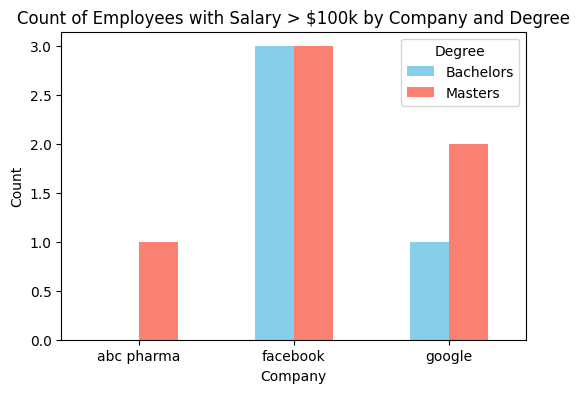

In [42]:
# Grouping the data by company and degree, and calculating the count of each group
degree_counts = data[data['salary_more_than_100k'] == 1].groupby(['company', 'degree']).size().unstack()

# Plotting the grouped bar chart
degree_counts.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(6, 4))
plt.title('Count of Employees with Salary > $100k by Company and Degree')
plt.xlabel('Company')
plt.ylabel('Count')
plt.legend(title='Degree', loc='upper right', labels=['Bachelors', 'Masters'])
plt.xticks(rotation=0)
plt.show()


After visualizing the data set, let us try using Decision Tree as well as Logistic Regression and check which one is performing better.

#### Converting Categorical Values in numerical data

In [43]:
# Importing label encoder
from sklearn.preprocessing import LabelEncoder

# Initialing label encoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

# Creating an inputs data-frame and extracting the target variable
inputs = data.drop('salary_more_than_100k', axis='columns')
target = data['salary_more_than_100k']

# Converting the categorical data into numerical data
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [44]:
# Checking the data
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


#### Observations:
##### Company
- 2 resembles google
- 1 resembles facebook
- 0 resembles abc pharma
##### Job
- 2 resembles sales executive
- 1 resembles computer programmer
- 0 resembles business manager
##### Degree
- 1 resembles master
- 0 resembles bachelors

In [45]:
# Removing categorical columns
inputs.drop(['company','job','degree'],axis='columns', inplace=True)
inputs

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


### DECISION TREE:

In [50]:
# Importing necessary module
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, train_size=0.2)
# Creating model of DecisionTree
model_dec = tree.DecisionTreeClassifier()

# Training the model
model_dec.fit(X_train, Y_train)        

# Predicting the result
model_dec.predict(X_test)
model_dec.predict([[2,1,0]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [47]:
# Checking the score
print(f"Model Score is: {round(model_dec.score(X_test, Y_test)*100, 2)}%")

Model Score is: 38.46%


### LOGISTIC REGRESSION

In [51]:
# Importing necessary module
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, train_size=0.2)
# Creating model of Logistic Regression
model_log = LogisticRegression()

# Training the model
model_log.fit(X_train, Y_train)        

# Predicting the result
model_log.predict(X_test)
model_log.predict([[2,1,1]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [49]:
# Checking the score
print(f"Model Score is: {round(model_log.score(X_test, Y_test)*100, 2)}%")

Model Score is: 61.54%
